lab 9
K-NN

We have data from the questionnaires survey (to ask people opinion) and objective testing with two attributes (acid durability and strength) to classify whether a special paper tissue is good or not. Here is four training samples as follows. Apply the K-nearest neighbour’s (KNN) algorithm when K=2, 3 and 4 to classify an instance (3, 7) as good or bad.
Implement the above using python without using scikit learn library. Plot the given samples Bad in Red color and Good in green color. Also draw the decision boundary. Calculate the distance using Euclidean, Manhattan, and  Minkowski and compare.   


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

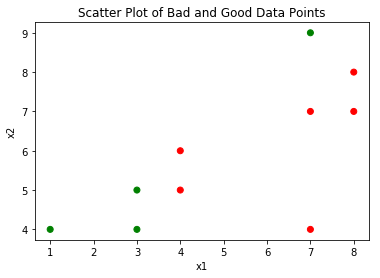

In [26]:
colors = {'bad': 'red', 'good': 'green'}
plt.scatter(data['x1'], data['x2'], c=data['y'].map(colors))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Bad and Good Data Points')
plt.show()

In [27]:
def calculate_distance(p1, p2, distance_type="Euclidean"):
    if distance_type == "Euclidean":
        return np.linalg.norm(p1-p2)
    elif distance_type == "Manhattan":
        distance = np.sum(np.abs(p1 - p2))
        return np.sum(np.abs(p1-p2))
    elif distance_type == "Minkowski":
        return np.power(np.sum(np.power(np.abs(p1-p2),3)),1/3)

In [37]:
def knn_manual(x,y,new_point,k,d_type="Euclidean"):
    dist=[calculate_distance(i,new_point,d_type)for i in x]
    sort_indices=np.argsort(dist)
    k_nearest_values=y[sort_indices[:k]]
    label,count=np.unique(k_nearest_values,return_counts=True)
    return label[np.argmax(count)]

In [38]:
data=pd.read_csv('data.csv')
data

,x1,x2,y
0,7,7,bad
1,7,4,bad
2,3,4,good
3,1,4,good
4,4,5,bad
5,3,5,good
6,4,6,bad
7,8,7,bad
8,7,9,good
9,8,8,bad


In [39]:
x=data.iloc[:,:2].values
y=data.iloc[:,2].values


In [40]:
new_point=[3,7]
k_values=[2,3,4]
results= {}
for k in k_values:
    results[k] = {}
    for d_type in ["Euclidean", "Manhattan", "Minkowski"]:
        classification=knn_manual(x,y,new_point,k,d_type)
        results[k][d_type] = {classification}
print(results)

{2: {'Euclidean': {'bad'}, 'Manhattan': {'bad'}, 'Minkowski': {'bad'}}, 3: {'Euclidean': {'bad'}, 'Manhattan': {'good'}, 'Minkowski': {'bad'}}, 4: {'Euclidean': {'bad'}, 'Manhattan': {'bad'}, 'Minkowski': {'bad'}}}


Implement the Question number 1 with using scikit learn library. Plot the given samples Bad in Red color and Good in green color. Also plot the decision boundary. Calculate the distance using Euclidean, Manhattan, and  Minkowski and compare.  

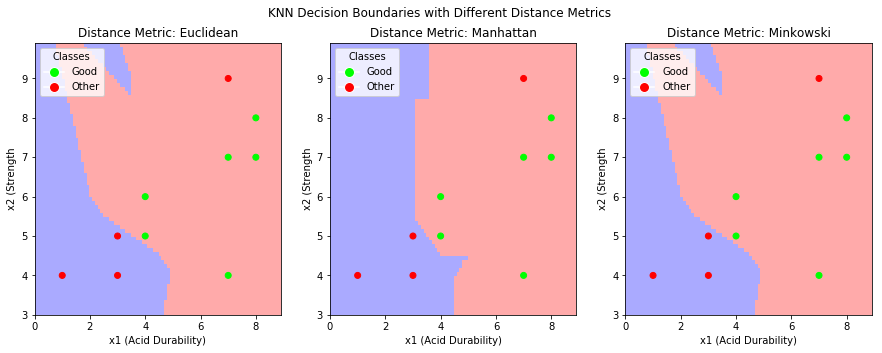

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

data = pd.read_csv("data.csv")

X = data[['x1', 'x2']]
y = data['y']

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

metrics = ['euclidean', 'manhattan', 'minkowski']


fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))

for i, metric in enumerate(metrics):

    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X, y)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    Z_numeric = np.where(Z == 'good', 1, 0)

    ax = axes[i]
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    ax.pcolormesh(xx, yy, Z_numeric, cmap=cmap_light)

    scatter = ax.scatter(X['x1'], X['x2'], c=(y == 'good'), cmap=ListedColormap(['#00FF00', '#FF0000']))
    
    ax.set_title(f'Distance Metric: {metric.capitalize()}')
    ax.set_xlabel('x1 (Acid Durability)')
    ax.set_ylabel('x2 (Strength')
  
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Good', markerfacecolor='#00FF00', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='#FF0000', markersize=10)]
    ax.legend(handles=legend_elements, title='Classes')

plt.suptitle("KNN Decision Boundaries with Different Distance Metrics")
plt.show()


There is a Car manufacturer company that has manufactured a new SUV car. The company wants to give the ads to the users who are interested in buying that SUV. So for this problem, we have a dataset that contains multiple user's information through the social network. The dataset contains lots of information but the Estimated Salary and Age we will consider for the independent variable and the Purchased variable is for the dependent variable. Below is the dataset:


Apply the K-NN algorithm when K=2, 3 and 4 to classify purchased or not.  Calculate the distance using Euclidean, Manhattan, and  Minkowski and compare. 
Test your developed K-NN without and with using Scikit Learn Library. 
Plot the Yellow points are for Purchased(1) and Green Points for not Purchased(0) variable. 
Show the graph has to classify users in the correct categories, as most of the users who didn't buy the SUV are in the red region, and users who bought the SUV are in the green region.

In [42]:
data1=pd.read_csv("data1.csv")

In [43]:
data1

,userid,gender,age,salary,purchaced
0,1,male,19,19000,0
1,2,male,35,20000,0
2,3,female,26,43000,0
3,4,female,27,57000,0
4,5,male,19,76000,0
5,6,male,27,58000,0
6,7,female,27,84000,0
7,8,female,32,150000,1
8,9,male,25,33000,0
9,10,female,35,65000,0


In [44]:
x=data1.iloc[:,2:4].values
y=data1.iloc[:,4].values

In [46]:
new_point=[20,150000]
k_values=[2,3,4]
results= {}
for k in k_val
ues:
    results[k] = {}
    for d_type in ["Euclidean", "Manhattan", "Minkowski"]:
        classification=knn_manual(x,y,new_point,k,d_type)
        results[k][d_type] = {classification}
print(results)

{2: {'Euclidean': {0}, 'Manhattan': {0}, 'Minkowski': {0}}, 3: {'Euclidean': {0}, 'Manhattan': {0}, 'Minkowski': {0}}, 4: {'Euclidean': {0}, 'Manhattan': {0}, 'Minkowski': {0}}}
